# Implementation of k-means clustering

k-means clustering is an ***unsupervised machine learning*** algorithm.

Unsupervised means data required for this algorithm needs no labels associated with it.

In [1]:
%matplotlib notebook

In [2]:
import numpy as np

In [3]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [10]:
data = pd.read_csv("500_Person_Gender_Height_Weight_Index.csv")

In [11]:
data.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


<IPython.core.display.Javascript object>


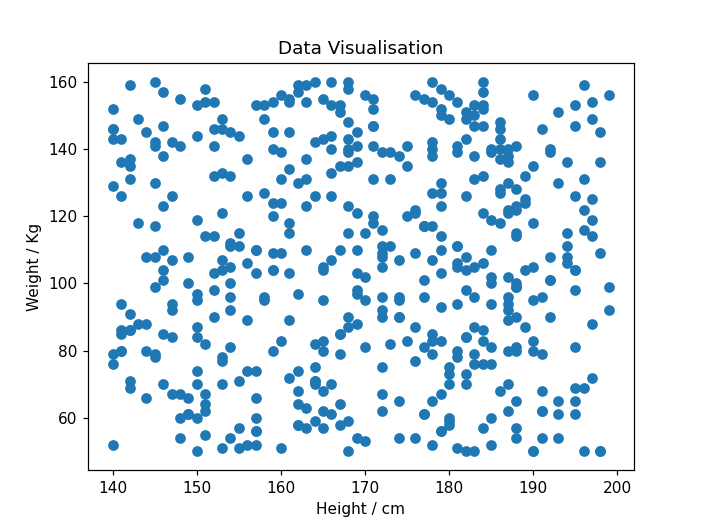

Text(0.5, 1.0, 'Data Visualisation')

In [12]:
plt.scatter(data["Height"],data["Weight"])
plt.xlabel("Height / cm")
plt.ylabel("Weight / Kg")
plt.title("Data Visualisation")

In [13]:
#Extracting only relevant data as input columns
X = data[["Height", "Weight"]]

### Randomly initialising centroids by sampling the dataset

     Height  Weight          1          2          3          4  Cluster
153     168     140  73.765490  35.018992  43.514043   4.501922        4
284     192     139  75.460808  31.682924  56.032119  24.193093        4
183     180      73  10.665376  35.679282  38.210105  72.410143        1
316     188      99  36.522447  10.598992  35.634327  49.510145        2
256     172     109  42.674807  11.355193  21.857705  35.659330        2


<IPython.core.display.Javascript object>


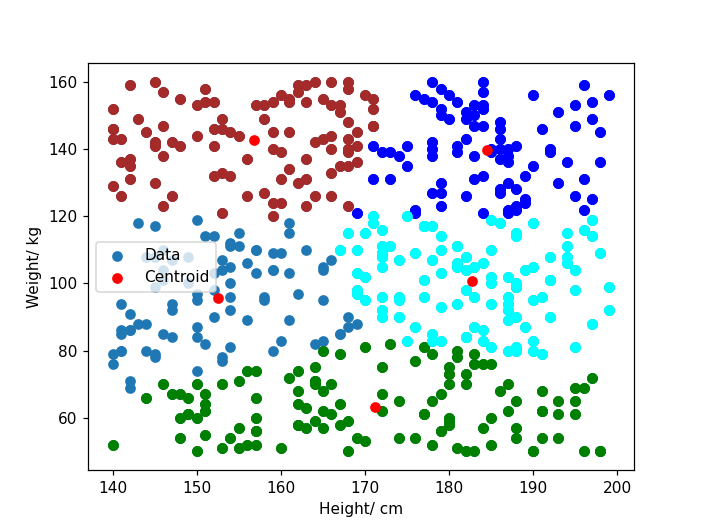

In [19]:
#K represents the number of centroids we want
k = 5

centroids = (X.sample(n = k))
print(centroids)
plt.figure()

#Lets see where our initial centroids lie
plt.scatter(X["Height"], X["Weight"])
plt.scatter(centroids["Height"],centroids["Weight"] , c = 'red')
plt.legend(["Data", "Centroid"])


# Understanding the Algorithm

**K-means clustering** aims to group together similar types of data points and *create clusters*.

We have to specify the number of clusters we need.

This algorithm has a wide variety of use cases in the real world. It is used by large businesses to create groupings of customers or even employees. It can be used to predict certain attributes (something we will see in this tutorial)

**It can also be used in image segmentation**

## The Algorithm

1. Initalise random Centroids.
2. Calculate the Euclidean distance between every data point and every centroid.
3. Assign every data point to it's closest cluster point.
4. Take average of all the points in each cluster individually to formulate new centroids.
5. Repeat the procedure from step 2 onwards untill the new centroid is the same as the last one i.e. there is no change in centroid position

# Formualting the algorithm

In [20]:
diff = 1
j=0

while(diff!=0):
    
    #creating a copy of the original dataframe
    XD=X
    i=1
    
    #iterate over each centroid point 
    for index1,row_c in centroids.iterrows():
        ED=[]
        
        #iterate over each data point
        for index2,row_d in XD.iterrows():
            
            #calculate distance between current point and centroid
            d1=(row_c["Height"]-row_d["Height"])**2
            d2=(row_c["Weight"]-row_d["Weight"])**2
            d=np.sqrt(d1+d2)
            
            #append distance in a list 'ED'
            ED.append(d)
            
        #append distace for a centroid in original data frame
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        
        #get distance from centroid of current data point
        min_dist=row[1]
        pos=1
        
        #loop to locate the closest centroid to current point
        for i in range(k):
            
            #if current distance is greater than that of other centroids
            if row[i+1] < min_dist:
                
                #the smaller distanc becomes the minimum distance 
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
        
    #assigning the closest cluster to each data point
    X["Cluster"]=C
    
    #grouping each cluster by their mean value to create new centroids
    centroids_new = X.groupby(["Cluster"]).mean()[["Weight","Height"]]
    if j == 0:
        diff=1
        j=j+1
        
    else:
        #check if there is a difference between old and new centroids
        diff = (centroids_new['Weight'] - centroids['Weight']).sum() + (centroids_new['Height'] - centroids['Height']).sum()
        print(diff.sum())
        
    centroids = X.groupby(["Cluster"]).mean()[["Weight","Height"]]

-15.188880928048093
-6.673020506693973
-3.3203258478491904
-4.301728598651891
-4.157139573994371
-0.6094541449691349
-1.4661312072122712
-0.5373279676549743
-0.018315407048476118
0.6294552476917801
0.0


In [21]:
X

,Height,Weight,1,2,3,4,Cluster,5
0,174,96,49.855653,44.873107,32.864661,9.880849,4,21.463328
1,189,87,64.424092,52.800915,29.710964,15.076400,4,37.462422
2,185,110,43.261124,29.616952,48.752783,9.586916,4,35.506787
3,195,104,54.455884,37.113221,47.215154,12.741797,4,43.280916
4,149,61,82.154498,86.280885,22.249583,52.066923,3,34.789792
...,...,...,...,...,...,...,...,...
495,150,153,12.257209,37.058986,92.194589,61.683043,1,57.446995
496,184,121,34.868183,18.621963,59.155487,20.347483,2,40.427838
497,141,136,17.173021,43.706462,78.734488,54.634320,1,42.007071
498,150,95,48.263672,56.431819,38.132148,33.186645,5,2.612257


#### Visualizing our end result

In [23]:
#setting color values for our 
color=['brown','blue','green','cyan','orange']

#plot data
for k in range(k):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["Height"],data["Weight"],c=color[k])
    
#plot centroids    
plt.scatter(centroids["Height"],centroids["Weight"],c='red')
plt.xlabel('Height/ cm')
plt.ylabel('Weight/ kg')


Text(41.94444598754247, 0.5, 'Weight/ kg')

# "K-means++ centroid selection" Implementation

One way of chosing centroids in k-means is to randomly choose points as centroids. 

This is a very inefficient way as the starting point of a centroid can *impact the final result*.

K-means++ is a smart way to initialise the centroids.

Steps: 
 - Randomly select initial centroid
 - Take distance of first centroid with every other data point 
 - The point farthest would be the next centroid
 - For next centroid, we take squared distance of every point with its closest centroid, the farthest distance in this case is the next centroid

In [ ]:
X1 = data[["ApplicantIncome", "LoanAmount"]]
centroids = X1.sample()
print(centroids)
k = 4
i = 1
dist = []
while i != k:
    max_dist = [0,0]
    #do throught the centroids
    for index, row in centroids.iterrows():
        #calculate distance of every centroid with every other data point 
        d = np.sqrt((X1["ApplicantIncome"] - row["ApplicantIncome"])**2 +(X1["LoanAmount"] - row["LoanAmount"])**2)
        #check which centroid has a max distance with another point
        if max(d) > max(max_dist):
            max_dist = d
            
    X1 = pd.concat([X1, max_dist], axis = 1)
    idx = X1.iloc[:,i+1].idxmax()
    max_coor = pd.DataFrame(X1.iloc[idx][["ApplicantIncome", "LoanAmount"]]).T
    centroids = pd.concat([centroids,max_coor])
    X1 = X1.drop(idx)
    i+=1
print("Coordinates found:")
print(centroids)